In [1]:
from qiskit.circuit import *
import numpy as np
from qiskit_aer import StatevectorSimulator
from qiskit.result import marginal_counts
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization.state_visualization import _bloch_multivector_data
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.add_control import add_control
from qiskit import transpile

import functools

In [2]:
def inverse_qft(n: int, qc: QuantumCircuit):
    iqft = QuantumCircuit(qc.qubits)
    # swap
    for i in range(n-1,-1,-1):
        iqft.h(i)
        for j in range(i):
            iqft.cp(np.pi/2**(i-j),j,i)

    for i in range(n//2):
        iqft.swap(i,n-1-i)
    iqft.barrier()
    
    qc.compose(iqft.inverse(),inplace=True)
    

In [3]:
n: int = 5
x: int = 5
init_vals = [(x & 1<<i)>>i for i in range(n)]

qc = QuantumCircuit(n)
# use this to verify general case
# expected_state = random_statevector(2**n)
# for extreme state case
expected_state = [complex(0,0) if _ != x else complex(0,1) for _ in range(2**n)]
print(f"Expected state: {expected_state}")

# 
init_state = Statevector(np.fft.ifft(np.array(expected_state),norm='ortho'))
qc.initialize(init_state)
print(f"Initial state: {init_state}")    # if init_vals[_]:
    #     qc.x(_)

Expected state: [0j, 0j, 0j, 0j, 0j, 1j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]
Initial state: Statevector([ 0.        +0.1767767j , -0.14698445+0.09821187j,
             -0.16332037-0.06764951j, -0.03448742-0.17337998j,
              0.125     -0.125j     ,  0.17337998+0.03448742j,
              0.06764951+0.16332037j, -0.09821187+0.14698445j,
             -0.1767767 +0.j        , -0.09821187-0.14698445j,
              0.06764951-0.16332037j,  0.17337998-0.03448742j,
              0.125     +0.125j     , -0.03448742+0.17337998j,
             -0.16332037+0.06764951j, -0.14698445-0.09821187j,
              0.        -0.1767767j ,  0.14698445-0.09821187j,
              0.16332037+0.06764951j,  0.03448742+0.17337998j,
             -0.125     +0.125j     , -0.17337998-0.03448742j,
             -0.06764951-0.16332037j,  0.09821187-0.14698445j,
              0.1767767 +0.j        ,  0.09821187+0.14698445j,
             -0.06764

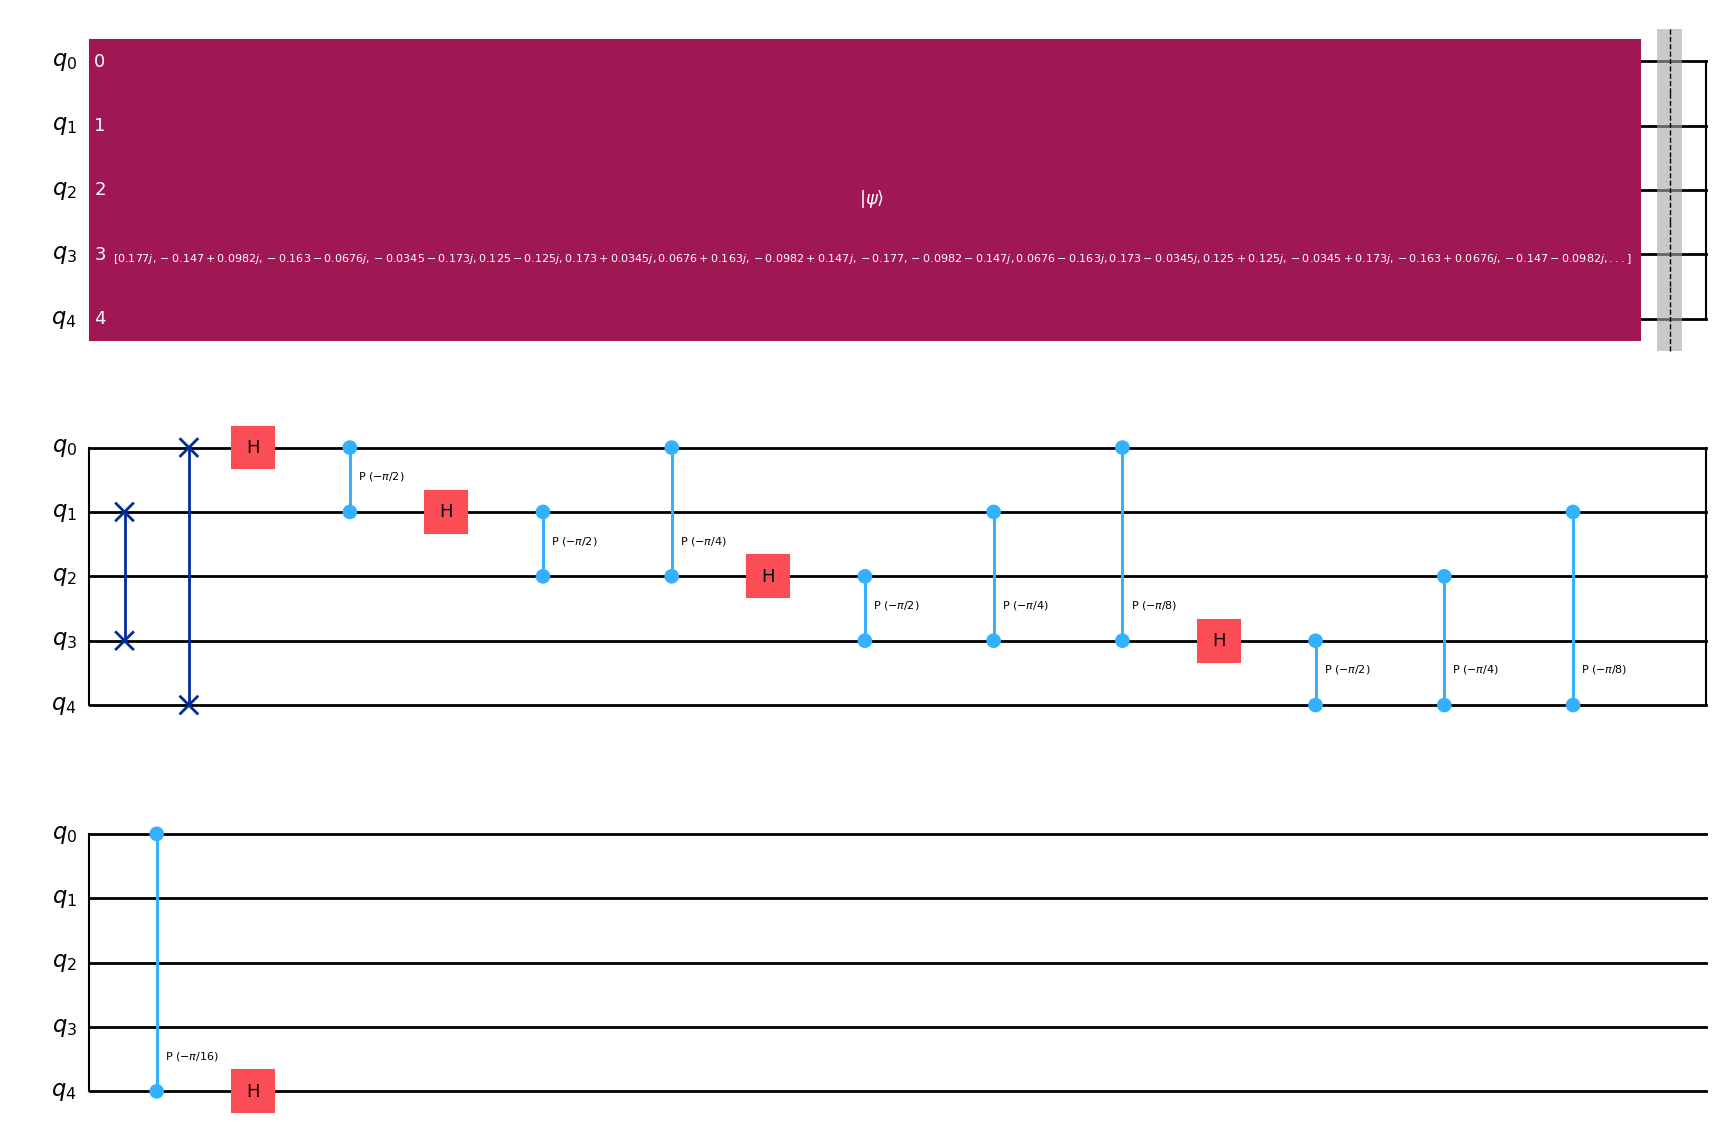

In [4]:
inverse_qft(n,qc)
qc.draw('mpl')

In [5]:
def round_complex(z: complex):
    return complex(round(z.real, 10), round(z.imag, 10))

In [6]:
real_final_state = Statevector.from_instruction(qc)
print(real_final_state)

Statevector([ 2.26618388e-20-3.13291992e-18j,
              2.73129232e-17-1.32995349e-17j,
              3.63559559e-18+8.68329000e-19j,
             -1.05892051e-18+1.18512680e-17j,
              8.12021505e-18-1.81911094e-18j,
             -1.10087220e-16+1.00000000e+00j,
             -7.15523453e-18+1.64607758e-18j,
              1.28821631e-17-1.25970223e-17j,
             -1.71994384e-18+9.31790017e-19j,
             -7.46789597e-20-4.82772348e-17j,
             -1.23595358e-18-4.59370868e-19j,
              8.95485503e-18-5.00531499e-19j,
             -9.67020165e-19+1.47598751e-18j,
              3.45464210e-17+8.90932590e-17j,
              2.74115558e-18-2.65917604e-18j,
             -9.11651507e-18+1.38681797e-17j,
              6.07995314e-18+3.36527028e-19j,
             -3.14869473e-17-9.84026754e-18j,
             -4.98065422e-18-3.66472190e-18j,
              1.09040548e-17+1.58895135e-18j,
              3.48965357e-20-9.77281952e-19j,
              4.69220261e-17+2.361

In [7]:
diff = np.abs(np.subtract(real_final_state,expected_state))
print(diff)
all([x<1e-15 for x in diff])


[3.13300188e-18 3.03788315e-17 3.73785374e-18 1.18984817e-17
 8.32148166e-18 4.57530788e-16 7.34213542e-18 1.80176329e-17
 1.95612869e-18 4.82772926e-17 1.31856090e-18 8.96883273e-18
 1.76455863e-18 9.55566010e-17 3.81905107e-18 1.65963025e-17
 6.08925945e-18 3.29887665e-17 6.18361569e-18 1.10192186e-17
 9.77904792e-19 5.25298254e-17 4.78142904e-18 7.96953827e-18
 3.91965882e-18 1.28105222e-17 3.81214534e-18 8.37909808e-18
 4.56050813e-18 5.60501566e-17 6.05249380e-19 7.21369046e-18]


True